In [2]:
!pip install shap

In [3]:
# first installed the shap (Shaply Additive exPlanations) package 
#it offers essential meaningful insight regarding the predictions created in project.
#simply it's shows SHAP interpretability.

import pandas as pd   #this library working on dataframes it is use for analyzing,cleaning, exploring and manipulating data
import numpy as np  #numpy is use for mathematical operation as well as for array
import matplotlib.pyplot as plt #matplotlib is use for plots like histograms, scatters, and display SHAP plots
import seaborn as sns #seaborn makes matplotlib plots looks attractive, nicer and more meaningful.

from sklearn.model_selection import train_test_split # scikit-learn is used to split dataset into traning and testing
from sklearn.linear_model import LinearRegression  # here import the linearregression model it's interpretable regression model
from sklearn.ensemble import RandomForestRegressor  # here import the RandomForestRegressor  is a ensemble model may decision trees combined
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #these funcations to compute regression performance metrics

import shap # it's shows SHAP interpretability, it's helps to tell ehich feature are the best or strong predictor of popularity in my dataset. 
plt.style.use('seaborn-v0_8') # it is only use for matplotlib graph looks nice and attractive.
sns.set_palette('husl')  #it makes seaborn graphs colourful.

In [4]:
#load the raw dataset.

#there are many quotes or commos inside the the text dataset it's shows error that's why here use 'engine=python' argument.
#through 'on_bad_lines' skip raws those are showing the bad lines.
raw_bookdataset=pd.read_csv(r"D:\DMML\books_Divesh.csv",
                            engine='python',
                            on_bad_lines='skip'
                           )
raw_bookdataset.head(2)  # through '.head()' method that shows first 2 rows.

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [137]:
# it's shows that total rows and columns in the dataset.
raw_bookdataset.shape

(11119, 12)

In [138]:
#information regardingcolumns,datatypes and non-null counts through '.info()' method.
raw_bookdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11119 entries, 0 to 11118
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11119 non-null  int64  
 1   title               11119 non-null  object 
 2   authors             11119 non-null  object 
 3   average_rating      11119 non-null  float64
 4   isbn                11119 non-null  object 
 5   isbn13              11119 non-null  int64  
 6   language_code       11119 non-null  object 
 7     num_pages         11119 non-null  int64  
 8   ratings_count       11119 non-null  int64  
 9   text_reviews_count  11119 non-null  int64  
 10  publication_date    11119 non-null  object 
 11  publisher           11119 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [139]:
#it's shows statistics for numeric columns through '.describe()'
raw_bookdataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11119.000000,11119.000000,1.111900e+04,11119.000000,1.111900e+04,11119.000000
mean,21308.966184,3.934135,9.759873e+12,336.439788,1.794832e+04,542.167371
std,13093.071002,0.350384,4.430554e+11,241.177969,1.125190e+05,2577.069549
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,47.000000
75%,32103.500000,4.135000,9.780873e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [140]:
#Handle missing values
raw_bookdataset.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [152]:
amazon_books=raw_bookdataset.copy()   #store'raw_bookdataset' in 'raw_books'

#dropna() rows with missing values
amazon_books=(
    amazon_books.dropna(
        subset=[
            'ratings_count', 
            'text_reviews_count',
            'average_rating', 
            '  num_pages', 
            'publication_date'
        ]
    )
)
#remove only with 0 ratings because i want only popularity book's accordong to research quetion.
amazon_books=(
    amazon_books[amazon_books['ratings_count']>0]
)

amazon_books.shape  # with the help of '.shape' only shows the total rows and columns after removing content.

(11039, 12)

In [29]:
amazon_books['language_code'].value_counts().head(25)

language_code
eng      8843
en-US    1406
en-GB     214
spa       212
fre       140
ger        96
jpn        45
mul        19
zho        14
por        10
grc         9
en-CA       7
ita         5
enm         3
lat         3
rus         2
swe         2
nl          1
ara         1
msa         1
glg         1
wel         1
nor         1
tur         1
gla         1
Name: count, dtype: int64

In [156]:
#only choose the english langauges
english_languages=['eng','en-US','en-GB']

#through 'isin()'which checks if column contain multiple values. and through copy funcation 'amazon_books'in 'english_books'
english_books=(
    amazon_books[amazon_books['language_code'].isin(english_languages)]
    .copy()
)

english_books.shape

(10463, 12)

In [195]:
english_books.head(4)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.


In [154]:
#feature enginerring
#create useful features.
only_english_books=english_books.copy()

#convert 'publication_date'into proper datetime type through '.to_datetime()'funcation.
only_english_books['publication_date']=(pd.to_datetime(
        only_english_books['publication_date'],
        errors='coerce'
    )
)

#drop those rows where on any punlication date available through '.dropna()' funcation
only_english_books=only_english_books.dropna(
    subset=['publication_date']
)
 

In [160]:
#make new column of publication year
only_english_books['publication_year']=(
    only_english_books['publication_date'].dt.year
)

#here assuming current year means particular book how many years the book has been in the market.
only_english_books['books_age']=(
    2025-only_english_books['publication_year']
)

# gives Rating per page  means compute a ratio with ratings divided by pages here use '+1' if in case any 'num_pages'is 0 or corrupted then '+1' is added to avoid division by zero
only_english_books['rating_per_page']=(
    only_english_books['average_rating']/(only_english_books['  num_pages']+1)
)

#gives reviews per rating this ratio shows how many people to write a review or only gives the rating.
only_english_books['reviews_per_rating']=(
    only_english_books['text_reviews_count']/(only_english_books['ratings_count']+1)
)

In [ ]:
'''The output shows that the column are been created such as 'publication_year', 'books_age', 'rating_per_page', 'reviews_per_rating', 'log_rating_counts', 
'log_text_reviews_counts', so I have created this new columns which helps my machine learning model to understand more about the book characteristics
and the popularity of it.

We have taken the 'publication_year' from books dataset 'publication_date', which help books to understand about which book is been published recently 
vs How long ago it is being published where which have different popularuty patterns

'Books_age' which directly tells that how many years before the  book is  being published and as machine learning model is required this information
because those books are have been existed early and it might be more popular .

The next column which is created is 'rating_per_page' It helps a model to know how many people have given the rating based on the pages of the books and 
the quality realted to book length . For example like 4.5 rating might be different for 300 pages book as compare to the 50 page book with the rating of 
4.5.


The column name Reviews_per_rating is a very strong predator for a popularity like for exa                                                               
                 mple, if a book has many ratings, but very it means that the
people are being engaged low and if the books has many reviews, we can say that readers are more interested in that, so basically this reviews for rating
help, the model about reader engagement.


Now here I am using the log_rating_count because log transform, it takes the large number of data, which is get compressed into smaller and smoother
range. Like when the number grows 10 times bigger, the log value compress a little bit. This is actually very useful. When data is very small values, 
very large values and everything in between this is just like my data set where there are many large values as well as small, so I have used the log
transformation.

The need for using use the log transform was as it creates the problem like the model becomes unstable, and also regression errors become large.
It is hard for modelling to learn non-linear patterns as well as the graph shape becomes extremely stretched.'''


In [161]:

#with the help of 'np.log1p'funcation compresses large values and makes the distribution more normal and smmoth as well as reduce impact of extreme outliers
only_english_books['log_ratings_count']=np.log1p(
    only_english_books['ratings_count']
)

only_english_books['log_text_reviews_count']=np.log1p(
    only_english_books['text_reviews_count']
)

only_english_books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,books_age,rating_per_page,reviews_per_rating,log_ratings_count,log_text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006,19,0.006998,0.013166,14.555394,10.225281
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004,21,0.005155,0.013571,14.582451,10.282677
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,2003,22,0.012521,0.038522,8.753687,5.501258
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2004,21,0.010459,0.015526,14.665485,10.500289
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,2004,21,0.001776,0.003959,10.631736,5.105945


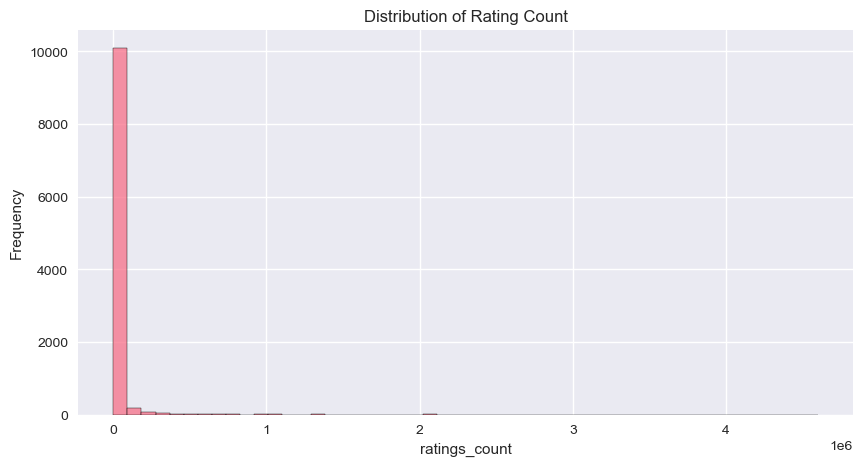

In [162]:
#Exploratory Data Analysis
#with the help of plots get to know data understanding

#Distribution of rating count
plt.figure(figsize=(10,5))                       #it's shows figure width and height
sns.histplot(
    only_english_books['ratings_count'],
    bins=50
)                                             #hisplot creates histogram plots and split the whole range of 'ratings_count' into 50 groups
plt.title('Distribution of Rating Count') # it gives the title on the top of the chart
plt.xlabel('ratings_count') #it gives name for x-axis 
plt.ylabel('Frequency')   # #it gives name for y-axis 
plt.show() #show graph

In [ ]:
'''The output of distribution of rating count shows that there is right cube distribution where all books are been compact on the left side and the bars
are extremely high at low values. As this data sheet have very few popular books like Harry Potter, et cetera, and where huge number of regular books
have some of the small rating numbers, so The graph is being created like this which causes that the data is not been balance. It is hard for the 
regression model to understand as well as the outline would dominate the model learning and the prediction of model becomes low Now as compare to the
distribution of log rating_counts'''


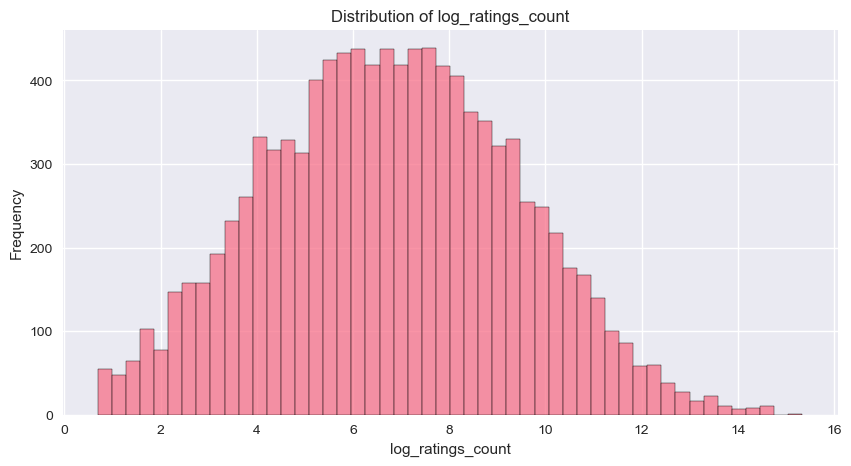

In [163]:
#Distribution after log transform

plt.figure(figsize=(10,5))
sns.histplot(
    only_english_books['log_ratings_count'],
    bins=50
)
plt.title('Distribution of log_ratings_count')
plt.xlabel('log_ratings_count')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''we can see that the output shows the bell shaped curve where the values are been spread equally . Which look almost normal, so this is called a log
normal distribution which is good for modelling where the distribution becomes nearly symmetric data spreads more equally rose bins, which is easier 
for the linear equation as well as the random forest and mix the sharp explanations, easy and clear and basically it improves the model accuracy 
strongly.'''

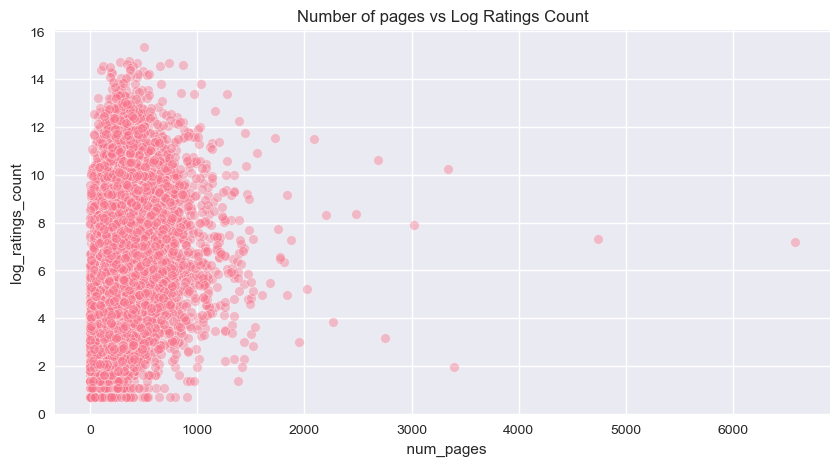

In [164]:
#num_pages vs log_ratings_count

plt.figure(figsize=(10,5))
sns.scatterplot(
    x='  num_pages',
    y='log_ratings_count',
    data=only_english_books,
    alpha=0.4
)                                 # alpha use for points looks transparent
plt.title('Number of pages vs Log Ratings Count')
plt.show()

In [ ]:
'''The output of the number of pages vs log_rating_count shows that most of the books are between 50 to 600 pages where we can see the thick 
grouping of points between 0 to 600 and log rating level within 3 to 14. That actually means that most of the books in the data set have a typical 
length. And we can rarely see the very long books with the pages of 1500 to 6000 and these books do not always have high ratings and also don’t show 
the strong popularity trend.So we can say that the number of pages it does not strongly shows that how many ratings a book receives.'''


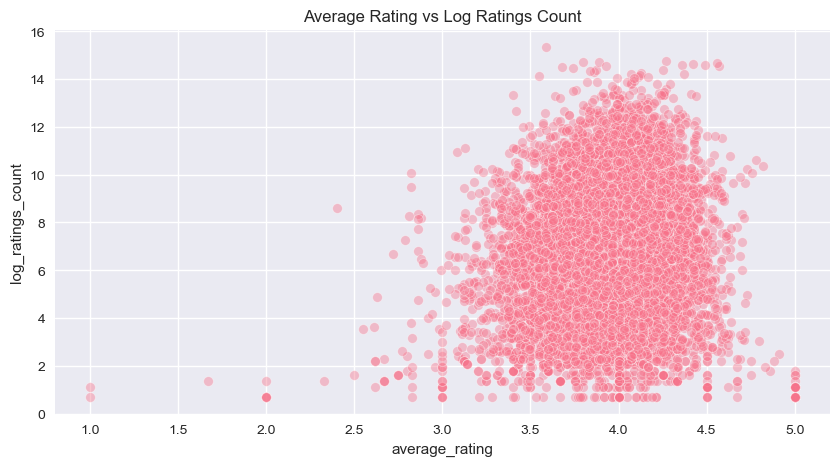

In [165]:
#average_rating vs log_ratings_count

plt.figure(figsize=(10,5))
sns.scatterplot(
    x='average_rating',
    y='log_ratings_count',
    data=only_english_books,
    alpha=0.4
)
plt.title('Average Rating vs Log Ratings Count')
plt.show()

In [ ]:
'''The output of average rating vs log_rating_counts shows that the books with very low rating are very less from 1 to 2.5 where we can see that 
most of the points near average rating are 1 to 2.5, which are rare and their log rating count is low. This makes sense that people rarely read books
or rate that are rated badly. Most of the books have rating within 3.5 to 4.5 where we can see the big amount of points around 3.5 to 4.5 and of Y axis 
7 to 14, which shows that the books which are popular where readers read those books in 3 to 5 range, but not with the perfect ratings.
The popularity of books is increased with the higher ratings, which is starting from the four that means that higher rated books are more likely to
receive more total ratings.'''

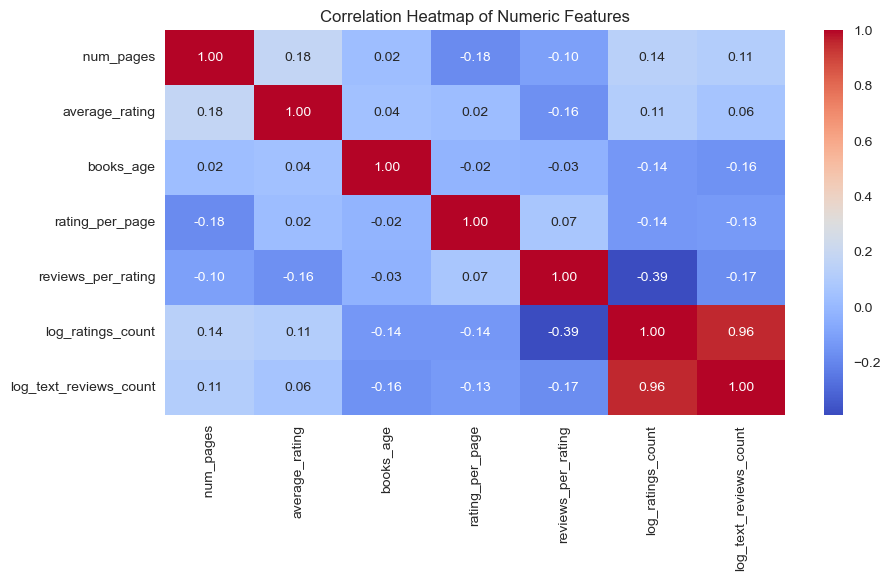

In [167]:
#correlation heatmap

main_columns=['  num_pages',
              'average_rating', 
              'books_age',
              'rating_per_page',
              'reviews_per_rating',
              'log_ratings_count',
              'log_text_reviews_count'
             ]
plt.figure(figsize=(10,5))

#'corr()'calculate correlation matrix and annot=True tells seaborn write the number inside each square.
#'fmt='.2f' this formats numbers to two decimal places.and cmap gives colour

sns.heatmap(
    only_english_books[main_columns].corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [ ]:
'''Here I have use a correlation hit map of numeric features with the output shows that how strongly two numeric values moves together where the value 
ranges from plus one which is perfect positively relationship which is red colour and -1, which show the perfect negative relationship which is blue 
in colour and no relationship that is zero means very weak which has been shown in white and light colour. It generally help us to understand that
which features are useful for prediction

Here my main target feature is lag_rating_count for predicting the popularity, so here in the output you we can see that the strongest correlation 
is 0.96 that is books with More written reviews, which also has more total ratings in the sense. We can say that reviews and ratings grow together
almost perfectly.
As I am going to use a linear regression and the random forest where high correlation means possible multicollinearity linear regression struggle.
If both log ratings and log text reviews are similar, but the random forest handle this perfectly. 
The reviews for rating vs log rating counts which shows the medium collinearity which is -0.39 where we can say that books have fever reviews per
rating which tend to be more popular. It basically means that reader tends to write popular books, but they don’t always write the reviews.

The reason behind using the hit map is where the correlation hit map gives me the understanding of the dataset as well as a feature selection like
which features to keep and which ones are not helpful. It also helps me to predict a modern interpretation which is actually good for sharp explanation
And it helped me to choose appropriate model as I can see that there are very strong and as well as very big correlation.'''

In [169]:
#prepare x and y for training and testing.
#y is the target variable
y=only_english_books['log_ratings_count']    #predict popularity of books. it's target.
features_columns=['  num_pages',
                  'average_rating',
                  'books_age',
                  'rating_per_page',
                  'reviews_per_rating'
                 ]                          #feature base on metadata means in the dataset.

#here define the x
x=only_english_books[features_columns    ]# all the book information here
x.head()

,num_pages,average_rating,books_age,rating_per_page,reviews_per_rating
0,652,4.57,19,0.006998,0.013166
1,870,4.49,21,0.005155,0.013571
2,352,4.42,22,0.012521,0.038522
3,435,4.56,21,0.010459,0.015526
4,2690,4.78,21,0.001776,0.003959


In [170]:
#split data into train and test

x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    train_size=0.8,                     #training data tech the ML model
    random_state=42                     #testing data check how the model learn.
                                        #0.2(20%)=test, 0.8(80%)=training , random_state it make sure the split is reproducible.
)

x_train.shape,x_test.shape

((8369, 5), (2093, 5))

In [171]:
#first define a funcation then print name of the funcation.
#y_true is target value from test set and y_pred predicted values on the test set then put model name.

def print_regression_metrics(
    y_true,
    y_pred,
    model_name='model'
):
    mse=mean_squared_error(y_true,y_pred)  #calculatenthe average of squared difference between real values and predicted values
    rmse=np.sqrt(mse)       #Root mean squared error it tells model prediction is this far away from the real values.
    mae=mean_absolute_error(y_true,y_pred)
    r2=r2_score(y_true,y_pred)

    print(f'{model_name} performance:')
    print(f'RMSE:{rmse:.4f}')    #after . show the 4 decimal places.
    print(f'MAE:{mae:.4f}')
    print(f'R^2:{r2:.4f}')
    print('-'*35)   #print separat line like--------- because of line output show in proper manner.

In [173]:
# now apply first model Linear Regression

linear_regression_model=LinearRegression()              #here creating linear regression model
linear_regression_model.fit(x_train,y_train)            #through'.fit' get to know tech the model which kind of books are popular based on traning data.
y_prediction_lr=linear_regression_model.predict(x_test) #make the prediction on unseen data means on test data
print_regression_metrics(y_test,y_prediction_lr,'Linear Regression')  #here prints calculated regression metrics for linear regression

Linear Regression performance:
RMSE:2.3139
MAE:1.8083
R^2:0.2086
-----------------------------------


In [174]:
#now apply second model RandomForest Regressor

randomforest_model=RandomForestRegressor(        # creating the random forest model
    n_estimators=200,                         #number of trees build the 200 trees in the forest, here 200 is a good balance for this dataset
    max_depth=None,                        # allow the model learn complex and depth patterns
    random_state=42,                      #set_random state here
    n_jobs=-1                            #it's just increase speed ,do not change the accuracy.
)

randomforest_model.fit(x_train,y_train)     #each and every tree gets a random sample of rows through x_train
y_prediction_rf=randomforest_model.predict(x_test)  #make the prediction on unseen data means on test data
print_regression_metrics(y_test,y_prediction_rf, 'Random Forest Regressor' )  #here prints calculated regression metrics for random forest.

Random Forest Regressor performance:
RMSE:1.9056
MAE:1.4930
R^2:0.4633
-----------------------------------


In [188]:
#comparison table for both model

#calculate metrics again but that time store the values.
linear_regression_mse=mean_squared_error(y_test,y_prediction_lr)  #'y_test'means real values and 'y_prediction_lr' means predicted values from linear regression
linear_regression_rmse=np.sqrt(linear_regression_mse)   #through 'np.sqrt' take the square root of MSE
linear_regression_mae=mean_absolute_error(y_test,y_prediction_lr)
linear_regression_r2=r2_score(y_test,y_prediction_lr)

randomforest_mse=mean_squared_error(y_test,y_prediction_rf)   #'y_test'means real values and 'y_prediction_rf' means predicted values from random forest
randomforest_rmse=np.sqrt(randomforest_mse)
randomforest_mae=mean_absolute_error(y_test,y_prediction_rf)
randomforest_r2=r2_score(y_test,y_prediction_rf)

#create table for bothe model comparison

models_comparison_table=pd.DataFrame({               #'pd.DataFrame({...})' withe the help of dataframe create a table from a dictionary.
    'model1':['Linear Regression', 'Random Forest'],
    'RMSE':[linear_regression_rmse,randomforest_rmse],
    'MAE':[linear_regression_mae,randomforest_mae],
    'R2':[linear_regression_r2,randomforest_r2]

})
models_comparison_table


,model1,RMSE,MAE,R2
0,Linear Regression,2.313915,1.808256,0.208586
1,Random Forest,1.905587,1.493010,0.463257


In [ ]:
'''The comparison table shows that I have used two models that is linear regression and the random forest, so I comparing both the models we get the 
values as RMSE 2.313915, which tells that it makes an average prediction error of plus -2.31 law rating units which is quite large and whereas MAE
is equals to 1.808 tells that on average predictions are 1.8 units away from the truth values and R Square which is equal to 0.2085 and this means
that the model only explains 20% of the variation in book popularity so basically by saying at this three values we can say that linear regression 
is weak and it can not capture the pattern in the data. It performs poorly because the features are non-linear relationships.

The second model random forest output where RMSE is 1.90 that is much smaller error compare to the linear regression where MAE equals to 1.49,
which means that on average the prediction error drops by -18% whereas R square which is 0.463 that is random forest. Explain 46% of the variation 
in book popularity. This is a huge improvement over the linear regression by 20%.
So by comparing both the models random forest is the best model because the random forest build many trees and it learns a complex patterns like 
branches, whereas it has predicted the book popularity more accurately as compare to linear regression as a random forest work better with the
countless data. It handles the feature interactions and also it handles outliers and skewed data.'''

In [127]:
print('Random Forest performs better as compare to Linear Regression,now using it for SHAP')


Random Forest performs better as compare to Linear Regression,now using it for SHAP


In [190]:
#random forest feature importances

randomforest_importances=randomforest_model.feature_importances_  #random forest gives important feature after traning
randomforest_importances_pairs=(
    sorted(
        zip(features_columns,randomforest_importances),   #through zip we  can combine the features names with important values.
        key=lambda x: -x[1]                            #x[1]shows important value and -x[1] make it negativwe because it sorts smallest to largest through -x[1] make it reverse and get largest importance first.
    )
)

for feat, imp in randomforest_importances_pairs: #feat means feature names and imp means important values
    print(f'{feat}:{imp:.3f}')                  #use the f-string for printing order in good way and 'imp:.3f' it shows 3 decimal places

reviews_per_rating:0.571
average_rating:0.123
rating_per_page:0.122
  num_pages:0.096
books_age:0.088


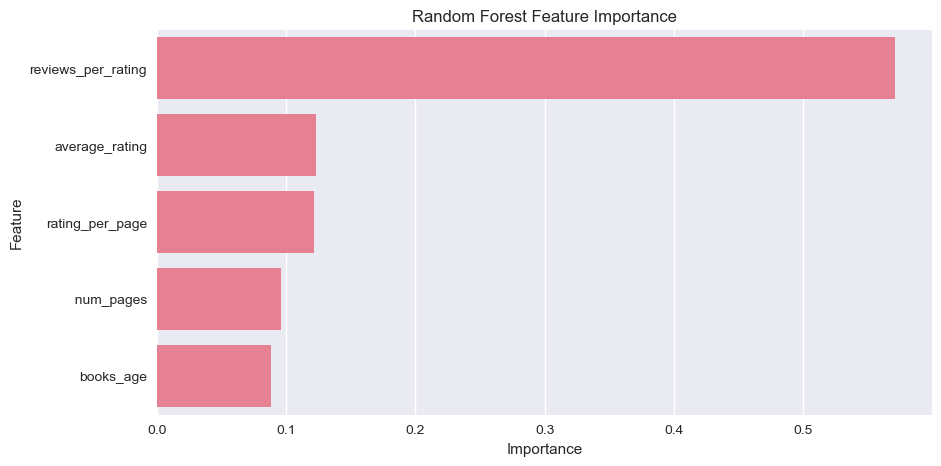

In [189]:
rf_feature_names=[f for f,_ in randomforest_importances_pairs] # here 'f' represent feature name and '_' represent the imp value
rf_feature_values=[v for _,v in randomforest_importances_pairs] # here'_'shows feature name and 'v' shows imp values

plt.figure(figsize=(10,5))
sns.barplot(x=rf_feature_values,     #seaborn create bar chart.
            y=rf_feature_names
           )
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
'''The output of feature importance shows that which features were most useful for predicting the target variable where we can see that the bar chart 
show the result like Reviews_per_rating. It is the most important feature which alone contributes 57% of the prediction Power that basically means if a
book get many ratings, but very fewer written reviews that are very popular and if reviews_per_rating is high, books are less popular, so this is
important because this ratio captures reader engagement behaviour and this is the strongest signal for predicting popularity.

Whereas the average_rating shows the books with some of the higher average rating, which tends to be more talked about and get more total ratings,
but we always have to remember that popularity does not always equals quality that’s why it’s important, but not the strongest as a compared to 
reviews_per_rating and talking about rating_per_page. It tells that how effectively a book clicks rating compare to it. Less shorter books might get more 
rating faster, which makes a meaningful feature. 

Talking about the num_pages, where there is a small influence of page count, we can say that very long books may get fewer readers, whereas the books 
with less pages are more accessible, but whereas we can say that page count doesn’t actually determine the popularity.
Books which means older books is equal to few new ratings, but again popularity is not been based on the age. As example, Harry Potter is old, but it
is still very popular, so we can say that it is the least important feature

The use of random forest feature importance is used because it helped to understand which feature matters the most and it’s supports the performance
better. It helps with the shap values letter. When we actually you know, use the shap for it, which is good for a model explanation and it also let 
us know that which features are important and which features I need to remove.'''


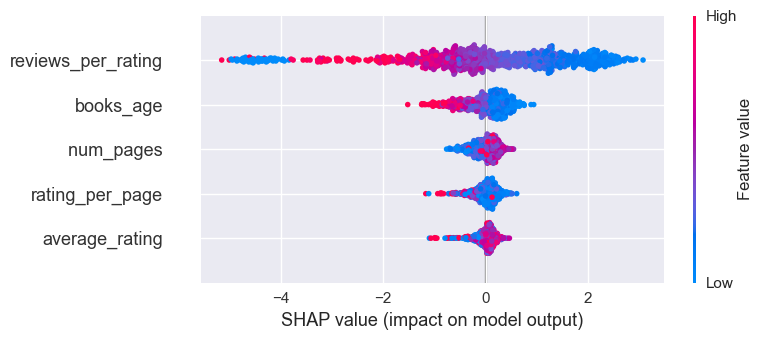

In [191]:
#SHAP (Shaply Additive exPlanations) interpretability for random forest
x_sample_data=x_test.sample(      #here through'.sample()'funcation pick up therendom subset of rows from x_test
    min(1000,len(x_test)),        # here x_test takes only 1000 rows because  SHAP works slow on very big data.
    random_state=42             #select the random books from dataset
)
shap_explainer=shap.TreeExplainer(randomforest_model)  # here 'shap.TreeExplainer' build the a special explainer designed for tree models simply it is work on random forest
shap_values=shap_explainer.shap_values(x_sample_data)  #through SHAP get to know how random forest predicts book popularity so explain it.
shap.summary_plot(shap_values,x_sample_data)   #here SHAP creates the beeswarm plot to represent the view of feature importance and direction 


In [ ]:
'''“SHAP helps us interpret the Random Forest by showing how each feature contributes to predicting book popularity.
Pink dots represent high feature values, blue dots represent low values, and the x-axis shows whether the feature pushes
the prediction up or down.
We found that ‘reviews_per_rating’ is the most influential feature, strongly increasing popularity when high.
This insight is only visible through SHAP, which satisfies the project requirement for model interpretability.'''

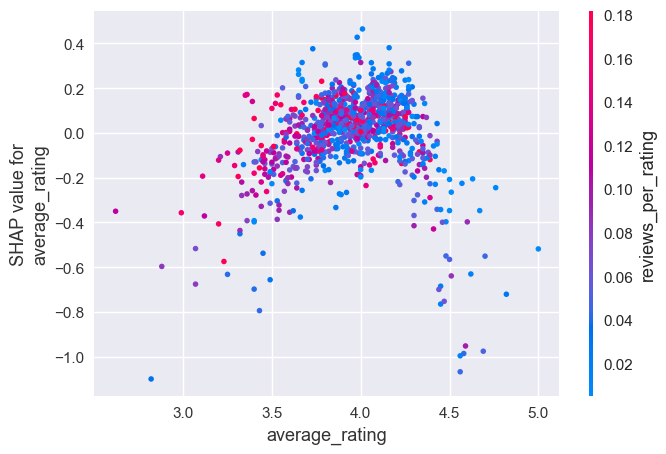

In [192]:
#SHAP dependence plot feature by fearture
#1)through shap make dependence plot of 'average_rating'
#here shows how average_rating impacts on popularity.
#'shap.dependance_plot' showspreticular feature, how it's value is related to SHAP effect on the prediction.
#if SHAP value is positive then books rating increase predicted log_ratings_count as well as if shap value is negative then rating is decreases the predicted popularity.

shap.dependence_plot('average_rating',shap_values,x_sample_data)

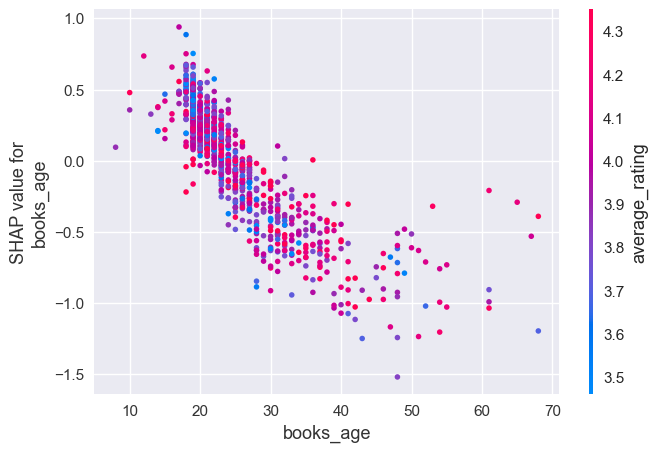

In [184]:
#2)through shap make dependence plot of 'books_age'

shap.dependence_plot('books_age', shap_values, x_sample_data)

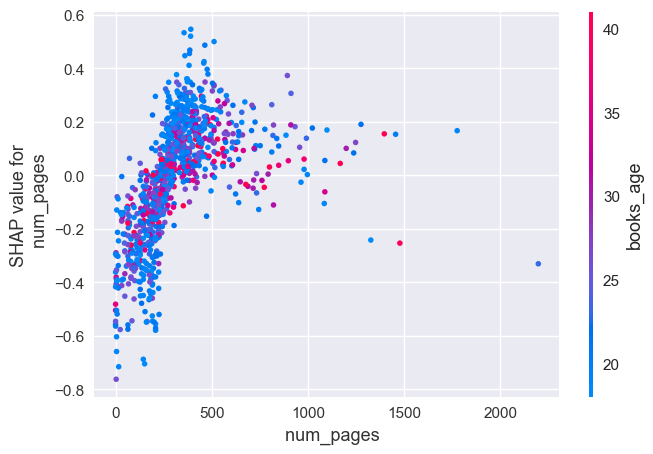

In [185]:
#3)through shap make dependence plot of 'num_pages'

shap.dependence_plot('  num_pages', shap_values, x_sample_data)

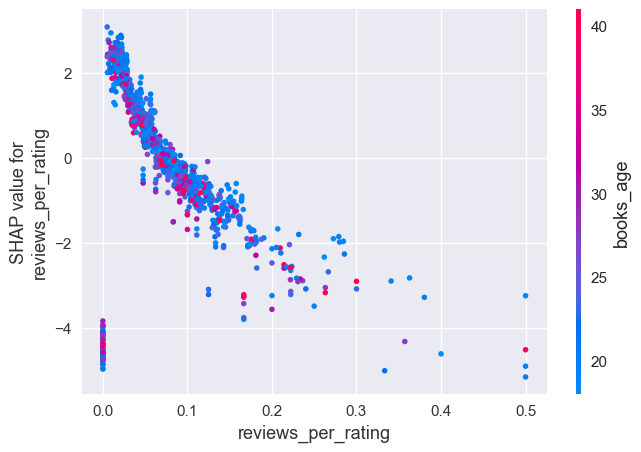

In [186]:
#4)through shap make dependence plot of 'reviwes_per_rating'

shap.dependence_plot('reviews_per_rating', shap_values, x_sample_data)

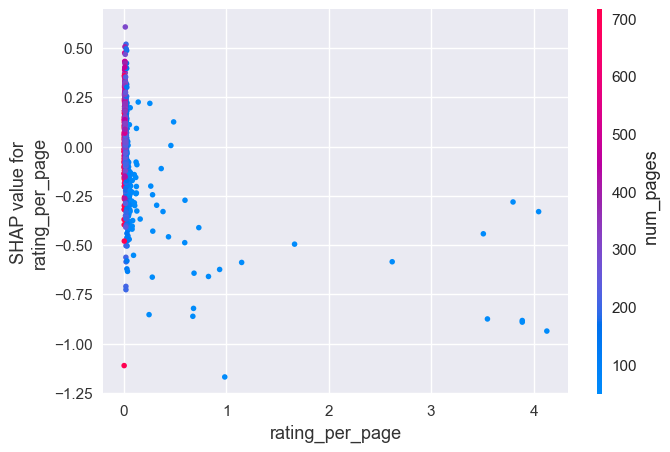

In [187]:
#5)through shap make dependence plot of 'rating_per_page'

shap.dependence_plot('rating_per_page',shap_values,x_sample_data)